### Facebook's Prophet && ARIMA

In [1]:
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from vega_datasets import data
import plotly.graph_objects as go
import plotly.io as pio

plt.style.use('seaborn-whitegrid')

In [2]:
dmajcity = pd.read_csv("AvgTempMajorCity.csv").drop('Unnamed: 0',axis=1)

In [3]:
dmajcity

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month,Year,Hemisphere,Seasons
0,1849-01-01,26.704000,1.435000,Abidjan,Côte D'Ivoire,5.63N,3.23W,Jan,1849,Northern Hemisphere,Winter
1,1849-02-01,27.434000,1.362000,Abidjan,Côte D'Ivoire,5.63N,3.23W,Feb,1849,Northern Hemisphere,Winter
2,1849-03-01,28.101000,1.612000,Abidjan,Côte D'Ivoire,5.63N,3.23W,Mar,1849,Northern Hemisphere,Spring
3,1849-04-01,26.140000,1.387000,Abidjan,Côte D'Ivoire,5.63N,3.23W,Apr,1849,Northern Hemisphere,Spring
4,1849-05-01,25.427000,1.200000,Abidjan,Côte D'Ivoire,5.63N,3.23W,May,1849,Northern Hemisphere,Spring
...,...,...,...,...,...,...,...,...,...,...,...
239172,2013-05-01,24.518000,0.384000,Taipei,Taiwan,24.92N,122.36E,May,2013,Northern Hemisphere,Summer
239173,2013-06-01,27.351000,0.533000,Taipei,Taiwan,24.92N,122.36E,Jun,2013,Northern Hemisphere,Summer
239174,2013-07-01,28.641000,0.629000,Taipei,Taiwan,24.92N,122.36E,Jul,2013,Northern Hemisphere,Monsoon
239175,2013-08-01,28.805000,0.499000,Taipei,Taiwan,24.92N,122.36E,Aug,2013,Northern Hemisphere,Monsoon


### Feature Engineering -- Change in Temperature

In [4]:
def order_monthidx(df):
    cats = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sept', 'Oct', 'Nov', 'Dec']
    df.index = pd.CategoricalIndex(df.index, categories=cats, ordered=True)
    df = df.sort_index()
    return df

In [5]:
months = dmajcity['Month'].unique()

In [6]:
months

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [7]:
def gen_detlaT(df,months):
    dfs = {}
    for month in months: #jan 
        temp = df[df['Month']==month]
        deltat = pd.DataFrame(temp['AverageTemperature']).diff() * -1 

        temp['DeltaT'] = deltat
        dfs[month] = temp
    
    return dfs
    

In [8]:
dfsdict = gen_detlaT(dmajcity, months)

<ipython-input-7-924a1efbc05b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['DeltaT'] = deltat


In [9]:
dmajcity = pd.concat(dfsdict.values())

In [10]:
dmajcity = dmajcity.reset_index(drop=True)

In [11]:
dmajcity = dmajcity.dropna()

In [12]:
dmajcity[dmajcity['City']=='Hyderabad'].Year

11911     1796
11912     1797
11913     1798
11914     1799
11915     1800
          ... 
231385    2008
231386    2009
231387    2010
231388    2011
231389    2012
Name: Year, Length: 2613, dtype: int64

In [13]:
temp = dmajcity.groupby(['City','Month'])[['DeltaT']].mean()

<AxesSubplot:xlabel='Month'>

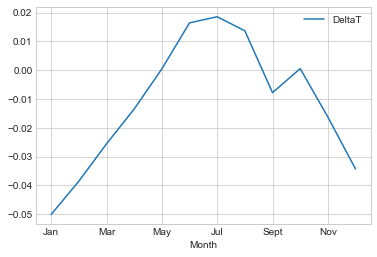

In [14]:
order_monthidx(temp.loc['Hyderabad',:]).plot()

In [15]:
dmajcity

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month,Year,Hemisphere,Seasons,DeltaT
1,1850-01-01,25.803000,1.943000,Abidjan,Côte D'Ivoire,5.63N,3.23W,Jan,1850,Northern Hemisphere,Winter,0.901000
2,1851-01-01,26.789000,1.249000,Abidjan,Côte D'Ivoire,5.63N,3.23W,Jan,1851,Northern Hemisphere,Winter,-0.986000
3,1852-01-01,26.163737,0.678569,Abidjan,Côte D'Ivoire,5.63N,3.23W,Jan,1852,Northern Hemisphere,Winter,0.625263
4,1853-01-01,26.163737,0.678569,Abidjan,Côte D'Ivoire,5.63N,3.23W,Jan,1853,Northern Hemisphere,Winter,-0.000000
5,1854-01-01,26.163737,0.678569,Abidjan,Côte D'Ivoire,5.63N,3.23W,Jan,1854,Northern Hemisphere,Winter,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
239172,2008-12-01,19.022000,0.192000,Taipei,Taiwan,24.92N,122.36E,Dec,2008,Northern Hemisphere,Winter,0.948000
239173,2009-12-01,18.026000,0.189000,Taipei,Taiwan,24.92N,122.36E,Dec,2009,Northern Hemisphere,Winter,0.996000
239174,2010-12-01,18.203000,0.294000,Taipei,Taiwan,24.92N,122.36E,Dec,2010,Northern Hemisphere,Winter,-0.177000
239175,2011-12-01,17.944000,0.396000,Taipei,Taiwan,24.92N,122.36E,Dec,2011,Northern Hemisphere,Winter,0.259000


### Prophet 

In [16]:
from prophet import Prophet

In [17]:
dmajcity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239165 entries, 1 to 239176
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239165 non-null  object 
 1   AverageTemperature             239165 non-null  float64
 2   AverageTemperatureUncertainty  239165 non-null  float64
 3   City                           239165 non-null  object 
 4   Country                        239165 non-null  object 
 5   Latitude                       239165 non-null  object 
 6   Longitude                      239165 non-null  object 
 7   Month                          239165 non-null  object 
 8   Year                           239165 non-null  int64  
 9   Hemisphere                     239165 non-null  object 
 10  Seasons                        239165 non-null  object 
 11  DeltaT                         239165 non-null  float64
dtypes: float64(3), int64(1), objec

In [18]:
# Convert dt to datetime
dmajcity['dt'] = pd.to_datetime(dmajcity['dt'])

In [19]:
dmajcity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239165 entries, 1 to 239176
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             239165 non-null  datetime64[ns]
 1   AverageTemperature             239165 non-null  float64       
 2   AverageTemperatureUncertainty  239165 non-null  float64       
 3   City                           239165 non-null  object        
 4   Country                        239165 non-null  object        
 5   Latitude                       239165 non-null  object        
 6   Longitude                      239165 non-null  object        
 7   Month                          239165 non-null  object        
 8   Year                           239165 non-null  int64         
 9   Hemisphere                     239165 non-null  object        
 10  Seasons                        239165 non-null  object        
 11  

In [20]:
# re-transform
tempdf = dmajcity[dmajcity['City']=='Hyderabad']
tempdf[tempdf['Year']==1796] 

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month,Year,Hemisphere,Seasons,DeltaT
11911,1796-01-01,22.759,2.322,Hyderabad,India,16.87N,78.70E,Jan,1796,Northern Hemisphere,Winter,-9.003000
31854,1796-02-01,25.094,1.453,Hyderabad,India,16.87N,78.70E,Feb,1796,Northern Hemisphere,Winter,-7.270000
51798,1796-03-01,27.725,2.443,Hyderabad,India,16.87N,78.70E,Mar,1796,Northern Hemisphere,Spring,-3.700000
71745,1796-04-01,31.280,1.789,Hyderabad,India,16.87N,78.70E,Apr,1796,Northern Hemisphere,Spring,-1.976000
91696,1796-05-01,32.701,1.406,Hyderabad,India,16.87N,78.70E,May,1796,Northern Hemisphere,Summer,2.045000
111649,1796-06-01,29.856,3.788,Hyderabad,India,16.87N,78.70E,Jun,1796,Northern Hemisphere,Summer,3.210000
131602,1796-07-01,26.749,2.606,Hyderabad,India,16.87N,78.70E,Jul,1796,Northern Hemisphere,Monsoon,4.304000
151555,1796-08-01,26.433,3.415,Hyderabad,India,16.87N,78.70E,Aug,1796,Northern Hemisphere,Monsoon,3.467000
171516,1796-09-01,26.793,3.762,Hyderabad,India,16.87N,78.70E,Sept,1796,Northern Hemisphere,Autumn,-1.627139
191421,1796-10-01,25.396,1.655,Hyderabad,India,16.87N,78.70E,Oct,1796,Northern Hemisphere,Autumn,0.958000


In [21]:
## Re-trasnforms the stack formation to the original format
def re_transform(df):
    dfs_list = []
    years = df['Year'].unique()
    for year in years:
        dfs_list.append(df[df['Year']==year])
    return pd.concat(dfs_list)

In [22]:
re_transform(tempdf)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month,Year,Hemisphere,Seasons,DeltaT
11911,1796-01-01,22.759000,2.322000,Hyderabad,India,16.87N,78.70E,Jan,1796,Northern Hemisphere,Winter,-9.003000
31854,1796-02-01,25.094000,1.453000,Hyderabad,India,16.87N,78.70E,Feb,1796,Northern Hemisphere,Winter,-7.270000
51798,1796-03-01,27.725000,2.443000,Hyderabad,India,16.87N,78.70E,Mar,1796,Northern Hemisphere,Spring,-3.700000
71745,1796-04-01,31.280000,1.789000,Hyderabad,India,16.87N,78.70E,Apr,1796,Northern Hemisphere,Spring,-1.976000
91696,1796-05-01,32.701000,1.406000,Hyderabad,India,16.87N,78.70E,May,1796,Northern Hemisphere,Summer,2.045000
...,...,...,...,...,...,...,...,...,...,...,...,...
91913,2013-05-01,34.650000,0.823000,Hyderabad,India,16.87N,78.70E,May,2013,Northern Hemisphere,Summer,-0.319000
111866,2013-06-01,29.487000,0.754000,Hyderabad,India,16.87N,78.70E,Jun,2013,Northern Hemisphere,Summer,2.288000
131819,2013-07-01,27.011000,0.478000,Hyderabad,India,16.87N,78.70E,Jul,2013,Northern Hemisphere,Monsoon,0.914000
151772,2013-08-01,26.923000,0.413000,Hyderabad,India,16.87N,78.70E,Aug,2013,Northern Hemisphere,Monsoon,0.581000


In [23]:
# Selective Filtering
province = 'Hyderabad'
hyd_df = dmajcity[dmajcity['City']=='Hyderabad']
hyd_df = re_transform(hyd_df)
hyd_df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month,Year,Hemisphere,Seasons,DeltaT
11911,1796-01-01,22.759000,2.322000,Hyderabad,India,16.87N,78.70E,Jan,1796,Northern Hemisphere,Winter,-9.003000
31854,1796-02-01,25.094000,1.453000,Hyderabad,India,16.87N,78.70E,Feb,1796,Northern Hemisphere,Winter,-7.270000
51798,1796-03-01,27.725000,2.443000,Hyderabad,India,16.87N,78.70E,Mar,1796,Northern Hemisphere,Spring,-3.700000
71745,1796-04-01,31.280000,1.789000,Hyderabad,India,16.87N,78.70E,Apr,1796,Northern Hemisphere,Spring,-1.976000
91696,1796-05-01,32.701000,1.406000,Hyderabad,India,16.87N,78.70E,May,1796,Northern Hemisphere,Summer,2.045000
...,...,...,...,...,...,...,...,...,...,...,...,...
91913,2013-05-01,34.650000,0.823000,Hyderabad,India,16.87N,78.70E,May,2013,Northern Hemisphere,Summer,-0.319000
111866,2013-06-01,29.487000,0.754000,Hyderabad,India,16.87N,78.70E,Jun,2013,Northern Hemisphere,Summer,2.288000
131819,2013-07-01,27.011000,0.478000,Hyderabad,India,16.87N,78.70E,Jul,2013,Northern Hemisphere,Monsoon,0.914000
151772,2013-08-01,26.923000,0.413000,Hyderabad,India,16.87N,78.70E,Aug,2013,Northern Hemisphere,Monsoon,0.581000


In [24]:
# DeltaT
dt_prophet = hyd_df[['dt','AverageTemperature']]
dt_prophet.columns = ['ds','y']

In [25]:
dt_prophet['y']

11911     22.759000
31854     25.094000
51798     27.725000
71745     31.280000
91696     32.701000
            ...    
91913     34.650000
111866    29.487000
131819    27.011000
151772    26.923000
171733    26.869335
Name: y, Length: 2613, dtype: float64

<AxesSubplot:xlabel='ds', ylabel='y'>

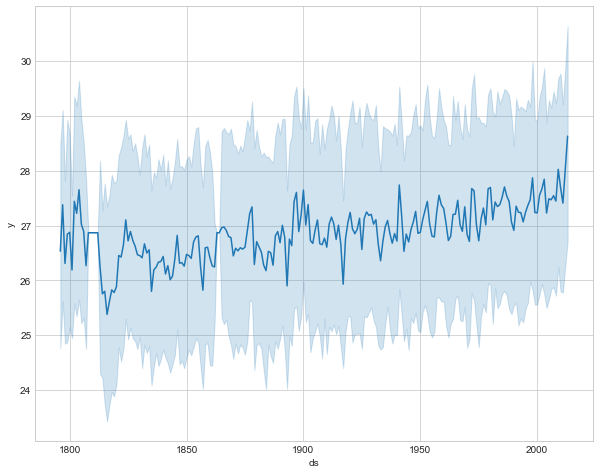

In [26]:
plt.figure(figsize=(10,8))
sns.lineplot(x=dt_prophet['ds'].dt.year, y=dt_prophet['y'])

In [27]:
dt_prophet

,ds,y
11911,1796-01-01,22.759000
31854,1796-02-01,25.094000
51798,1796-03-01,27.725000
71745,1796-04-01,31.280000
91696,1796-05-01,32.701000
...,...,...
91913,2013-05-01,34.650000
111866,2013-06-01,29.487000
131819,2013-07-01,27.011000
151772,2013-08-01,26.923000


In [28]:
# Initialise Model 
model = Prophet()

In [29]:
model.fit(dt_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [31]:
future_dates=model.make_future_dataframe(periods=2920)

In [32]:
future_dates.tail()

,ds
5528,2021-08-26
5529,2021-08-27
5530,2021-08-28
5531,2021-08-29
5532,2021-08-30


In [33]:
prediction=model.predict(future_dates)

In [34]:
pred_df = prediction

In [35]:
pred_df['year'] = pred_df['ds'].dt.year
pred_df['day'] = pred_df['ds'].dt.day
pred_df['month'] = pred_df['ds'].dt.month

In [36]:
def prune_months(df):
    df = df[df['year']>2013]
    df = df[df['day']==1]
    df = df.drop('day',axis=1)
    return df

In [37]:
pred_df =  prune_months(pred_df)

In [38]:
pred_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,year,month
2734,2014-01-01,27.605343,22.472639,24.785437,27.605343,27.605343,-4.024911,-4.024911,-4.024911,-4.024911,-4.024911,-4.024911,0.0,0.0,0.0,23.580432,2014,1
2765,2014-02-01,27.606214,24.817748,27.289525,27.606214,27.606214,-1.509316,-1.509316,-1.509316,-1.509316,-1.509316,-1.509316,0.0,0.0,0.0,26.096898,2014,2
2793,2014-03-01,27.607000,28.225860,30.704397,27.607000,27.607000,1.866353,1.866353,1.866353,1.866353,1.866353,1.866353,0.0,0.0,0.0,29.473353,2014,3
2824,2014-04-01,27.607871,30.666691,33.178775,27.607871,27.607871,4.379347,4.379347,4.379347,4.379347,4.379347,4.379347,0.0,0.0,0.0,31.987217,2014,4
2854,2014-05-01,27.608713,32.224809,34.668349,27.608713,27.608713,5.786946,5.786946,5.786946,5.786946,5.786946,5.786946,0.0,0.0,0.0,33.395659,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5381,2021-04-01,27.679679,30.862234,33.193675,27.668473,27.691024,4.380771,4.380771,4.380771,4.380771,4.380771,4.380771,0.0,0.0,0.0,32.060450,2021,4
5411,2021-05-01,27.680522,32.211966,34.598935,27.669091,27.692263,5.699514,5.699514,5.699514,5.699514,5.699514,5.699514,0.0,0.0,0.0,33.380036,2021,5
5442,2021-06-01,27.681392,29.418103,31.802119,27.669781,27.693304,2.916890,2.916890,2.916890,2.916890,2.916890,2.916890,0.0,0.0,0.0,30.598282,2021,6
5472,2021-07-01,27.682235,26.703509,29.176078,27.670420,27.694395,0.265184,0.265184,0.265184,0.265184,0.265184,0.265184,0.0,0.0,0.0,27.947419,2021,7


In [39]:
pred_df[pred_df['year']==2018][['month','yhat','yhat_lower','yhat_upper']]

,month,yhat,yhat_lower,yhat_upper
4195,1,23.621461,22.425523,24.861085
4226,2,26.137927,25.002894,27.337757
4254,3,29.514382,28.378013,30.687652
4285,4,32.028247,30.758103,33.256612
4315,5,33.436688,32.341577,34.637568
4346,6,30.510760,29.323567,31.678619
4376,7,27.862323,26.556659,28.973154
4407,8,27.392843,26.211274,28.572307
4438,9,27.550866,26.246064,28.651484
4468,10,26.731021,25.552102,27.862267


In [40]:
pred_df[pred_df['year']==2020][['month','yhat']]

,month,yhat
4925,1,23.535941
4956,2,26.121499
4985,3,29.548271
5016,4,32.052027
5046,5,33.279909
5077,6,30.642501
5107,7,27.993028
5138,8,27.400866
5169,9,27.487697
5199,10,26.592936


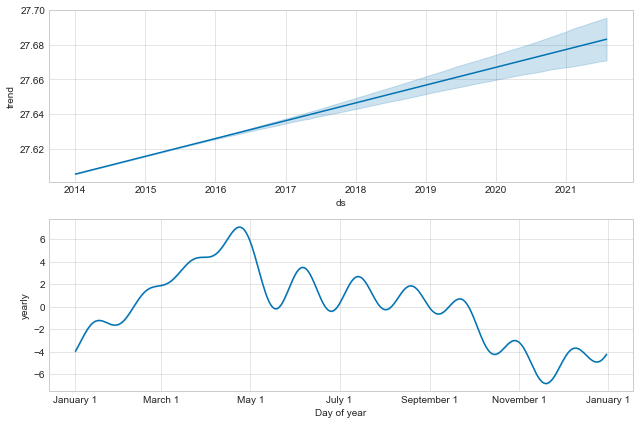

In [41]:
model.plot_components(pred_df);

In [65]:
def prophetize(dmajcity, province,periods=None):
    
    df = dmajcity[dmajcity['City']==province]
    df = re_transform(df)
    
    # initialise model
    model = Prophet(yearly_seasonality=True)
    
    dt_prophet = df[['dt','AverageTemperature']]
    dt_prophet.columns = ['ds','y']
    
    # fit model
    model.fit(dt_prophet)
    
    future_dates=model.make_future_dataframe(periods=2920)
    prediction=model.predict(future_dates)
    pred_df = prediction
    pred_df['year'] = pred_df['ds'].dt.year
    pred_df['day'] = pred_df['ds'].dt.day
    pred_df['month'] = pred_df['ds'].dt.strftime("%b")
    
    # prune dates
    pred_df = pred_df[pred_df['year']>2013]
    pred_df = pred_df[pred_df['day']==1]
    pred_df = pred_df.drop('day',axis=1)
    
    return pred_df
    

In [66]:
hydpreds = prophetize(dmajcity, province='Hyderabad')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [124]:
torpreds = prophetize(dmajcity, province='Toronto')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Validating Results

In [45]:
# Original data
hydorg = pd.read_excel('HydAvg18-20Org.xlsx')
tororg = pd.read_excel('TorontoAvg18-20Org.xlsx')


In [144]:
import plotly.graph_objects as go
def project_yhat(data,city,year,mode='compound'):

    if mode == 'compound':
        data = data[(data['year']>=2018)&(data['year']<2021)]
        prompt = 'Prophet Forecast for Average Temperatures in {}'
        if city == 'Hyderabad':
            original = hydorg['Average']
        else:
            original = tororg['Avg.Temp']
    elif mode == 'individual':
        data = data[data['year']==year]
        prompt = 'Prophet Forecast for Average Temperatures in {}, {}'
        
        if city == 'Hyderabad':
            original = hydorg[hydorg['year ']==year]['Average']
        else:
            original = tororg[tororg['year ']==year]['Avg.Temp']

        
    x = data['ds']
    y0 = data.yhat
    y1 = data.yhat_lower
    y2 = data.yhat_upper

    


    # Create traces
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y0,
                        mode='lines+markers',
                        name='yhat', line=dict(color='crimson')))
    fig.add_trace(go.Scatter(x=x, y=original,
                        mode='lines+markers',
                        name='original', line=dict(color='dodgerblue')))
    fig.add_trace(go.Scatter(x=x, y=y1,
                        name='yhat_lower', line=dict(color='green', width=2,
                              dash='dash')))
    fig.add_trace(go.Scatter(x=x, y=y2,

                        name='yhat_lower', line=dict(color='orange', width=2,
                              dash='dot')))

    fig.update_traces(marker=dict(
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

    fig.update_layout(
        title=prompt.format(city,year),
        title_x=0.5,
        xaxis_title="Months",
        yaxis_title="Average Temperature",
        legend_title="Legend",)

    fig.show()


In [136]:
project_yhat(hydpreds,city='Hyderabad',mode='compound')

In [137]:
project_yhat(torpreds,city='Toronto',mode='compound')

In [145]:
project_yhat(torpreds,city='Toronto',year=2020,mode='individual')

In [146]:
project_yhat(hydpreds,city='Hyderabad',year=2020,mode='individual')

 **references**
 https://www.timeanddate.com/weather/india/hyderabad/historic?month=10&year=2020

### Seasonal Quantification

* Iteratively slice dataframes into the seasonalities
* Iteratively fit the data into new models with yearly_seasonality=True
* Figure out the logic for the predicting future years
* Present the quantification in a range

In [160]:
hyddf = dmajcity[dmajcity['City']=='Hyderabad']
hyddf[hyddf['Seasons']=='Winter']

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month,Year,Hemisphere,Seasons,DeltaT
11911,1796-01-01,22.759000,2.322000,Hyderabad,India,16.87N,78.70E,Jan,1796,Northern Hemisphere,Winter,-9.003000
11912,1797-01-01,26.869335,0.956286,Hyderabad,India,16.87N,78.70E,Jan,1797,Northern Hemisphere,Winter,-4.110335
11913,1798-01-01,22.789000,2.426000,Hyderabad,India,16.87N,78.70E,Jan,1798,Northern Hemisphere,Winter,4.080335
11914,1799-01-01,22.441000,2.254000,Hyderabad,India,16.87N,78.70E,Jan,1799,Northern Hemisphere,Winter,0.348000
11915,1800-01-01,22.979000,1.872000,Hyderabad,India,16.87N,78.70E,Jan,1800,Northern Hemisphere,Winter,-0.538000
...,...,...,...,...,...,...,...,...,...,...,...,...
231385,2008-12-01,23.396000,0.218000,Hyderabad,India,16.87N,78.70E,Dec,2008,Northern Hemisphere,Winter,0.071000
231386,2009-12-01,23.173000,0.195000,Hyderabad,India,16.87N,78.70E,Dec,2009,Northern Hemisphere,Winter,0.223000
231387,2010-12-01,22.234000,0.305000,Hyderabad,India,16.87N,78.70E,Dec,2010,Northern Hemisphere,Winter,0.939000
231388,2011-12-01,23.613000,0.822000,Hyderabad,India,16.87N,78.70E,Dec,2011,Northern Hemisphere,Winter,-1.379000


In [163]:
# iteratively creating seasonal dfs

def gen_seasonal_dfs(dmajcity,city):
    
    datapackage = {}
    seasondfs = []
    
    # slice by CITY
    data = dmajcity[dmajcity['City']=='Hyderabad']
    
    # get seasons 
    seasons = data['Seasons'].unique()
    datapackage['Seasons'] = seasons 
    
    # hemisphere 
    datapackage['Hemisphere'] = data['Hemisphere'].unique()[0]
    
    for season in seasons:
        seasondfs.append(data[data['Seasons']==season])
        
    datapackage['dfs'] = seasondfs
    
    return datapackage

In [164]:
datapackage = gen_seasonal_dfs(dmajcity,city='Hyderabad')

In [167]:
hyddfs = datapackage['dfs']

In [168]:
hyddfs[0]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month,Year,Hemisphere,Seasons,DeltaT
11911,1796-01-01,22.759000,2.322000,Hyderabad,India,16.87N,78.70E,Jan,1796,Northern Hemisphere,Winter,-9.003000
11912,1797-01-01,26.869335,0.956286,Hyderabad,India,16.87N,78.70E,Jan,1797,Northern Hemisphere,Winter,-4.110335
11913,1798-01-01,22.789000,2.426000,Hyderabad,India,16.87N,78.70E,Jan,1798,Northern Hemisphere,Winter,4.080335
11914,1799-01-01,22.441000,2.254000,Hyderabad,India,16.87N,78.70E,Jan,1799,Northern Hemisphere,Winter,0.348000
11915,1800-01-01,22.979000,1.872000,Hyderabad,India,16.87N,78.70E,Jan,1800,Northern Hemisphere,Winter,-0.538000
...,...,...,...,...,...,...,...,...,...,...,...,...
231385,2008-12-01,23.396000,0.218000,Hyderabad,India,16.87N,78.70E,Dec,2008,Northern Hemisphere,Winter,0.071000
231386,2009-12-01,23.173000,0.195000,Hyderabad,India,16.87N,78.70E,Dec,2009,Northern Hemisphere,Winter,0.223000
231387,2010-12-01,22.234000,0.305000,Hyderabad,India,16.87N,78.70E,Dec,2010,Northern Hemisphere,Winter,0.939000
231388,2011-12-01,23.613000,0.822000,Hyderabad,India,16.87N,78.70E,Dec,2011,Northern Hemisphere,Winter,-1.379000
